#EXPLORATORY DATA ANALYSIS


In [35]:
#Load Dataset
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

path= '/Users/lannguyen/Desktop/Fall 2020/DataScience/f20-ds-hw-dinhlan86/homework-2/PUF2019.xlsx'
data=pd.read_excel(path)

In [36]:
data.info()
#Data has 22 columns, 14 numerical features, and 8 categorical features and total of 4916 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CONTROL      4916 non-null   int64  
 1   SHIPMONTH    4916 non-null   int64  
 2   WEIGHT       4916 non-null   float64
 3   WGTADJ       4916 non-null   float64
 4   REGION       4916 non-null   int64  
 5   SECTIONS     4916 non-null   int64  
 6   STATUS       4916 non-null   int64  
 7   PRICE        4916 non-null   int64  
 8   SQFT         4916 non-null   int64  
 9   BEDROOMS     4916 non-null   int64  
 10  TITLED       4916 non-null   int64  
 11  LOCATION     4916 non-null   int64  
 12  FOUNDATION   4916 non-null   int64  
 13  SECURED      4916 non-null   int64  
 14  JSTATUS      4916 non-null   object 
 15  JPRICE       4916 non-null   object 
 16  JSQFT        4916 non-null   object 
 17  JBEDROOM     4916 non-null   object 
 18  JTITLE       4916 non-null   object 
 19  JLOCAT

In [37]:
data.describe()

,CONTROL,SHIPMONTH,WEIGHT,WGTADJ,REGION,SECTIONS,STATUS,PRICE,SQFT,BEDROOMS,TITLED,LOCATION,FOUNDATION,SECURED
count,4.916000e+03,4916.000000,4916.000000,4916.000000,4916.00000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000
mean,1.906464e+07,201906.443653,18.365226,1.049644,2.74227,1.698942,1.708910,86474.241253,1448.205452,2.786819,4.313466,4.569976,4.600488,5.335232
std,3.472673e+04,3.473000,14.333816,0.059241,1.06898,0.487991,0.531117,41995.867250,509.739199,1.292327,3.442359,3.326362,3.288358,3.986333
min,1.901000e+07,201901.000000,1.000000,0.941100,1.00000,1.000000,1.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.903036e+07,201903.000000,7.818200,1.015400,2.00000,1.000000,1.000000,58000.000000,1100.000000,3.000000,2.000000,1.000000,2.000000,1.000000
50%,1.906038e+07,201906.000000,12.383300,1.050100,3.00000,2.000000,2.000000,87000.000000,1400.000000,3.000000,2.000000,3.000000,3.000000,9.000000
75%,1.909039e+07,201909.000000,25.885700,1.071200,4.00000,2.000000,2.000000,108250.000000,1700.000000,3.000000,9.000000,9.000000,9.000000,9.000000
max,1.912040e+07,201912.000000,64.692900,1.258100,5.00000,3.000000,9.000000,346000.000000,3500.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [38]:
#Checking missing value
data.isna().any()


CONTROL        False
SHIPMONTH      False
WEIGHT         False
WGTADJ         False
REGION         False
SECTIONS       False
STATUS         False
PRICE          False
SQFT           False
BEDROOMS       False
TITLED         False
LOCATION       False
FOUNDATION     False
SECURED        False
JSTATUS        False
JPRICE         False
JSQFT          False
JBEDROOM       False
JTITLE         False
JLOCATION      False
JFOUNDATION    False
JSECURED       False
dtype: bool

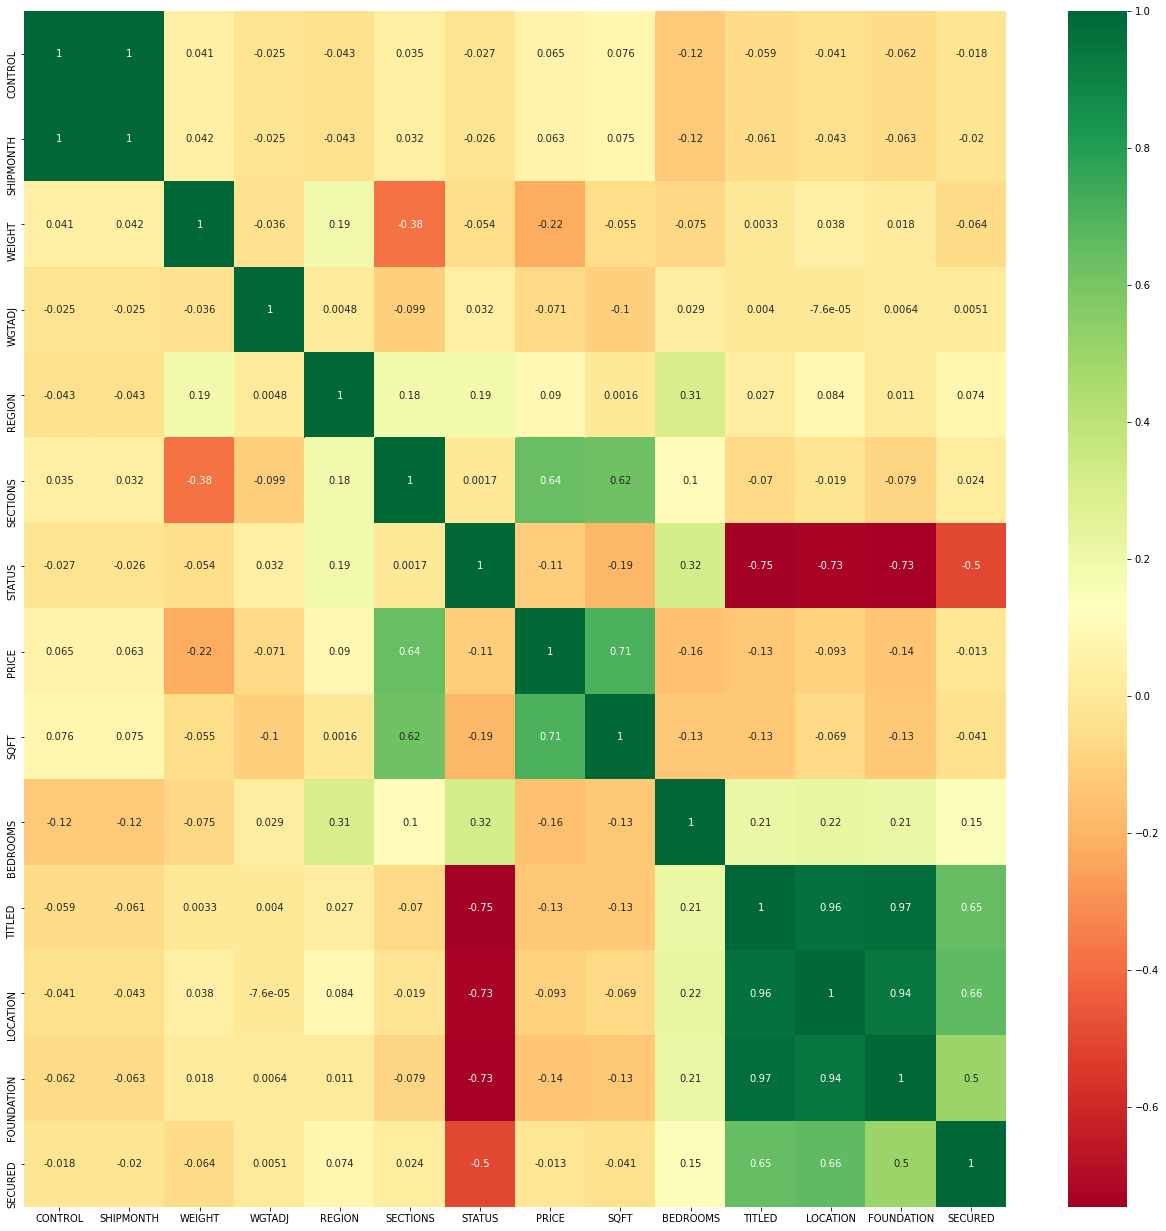

In [39]:
#HEAT MAP TOP PLOT IMPORTANT FEATURES 
X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## AS WE CAN SEE THERE IS TRONG CORRELATOION BETWEEN SECT AND SQFT WITH PRICE

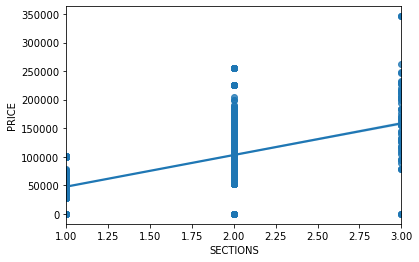

In [40]:
sns.regplot(x="SECTIONS", y="PRICE", data=data)


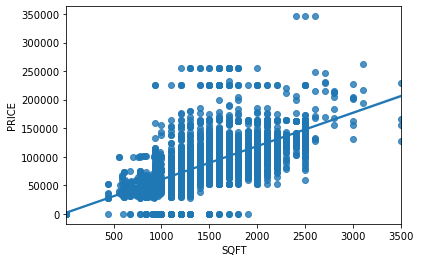

In [41]:
sns.regplot(x="SQFT", y="PRICE", data=data)

In [42]:
##BUILDING REGRESSION MODEL
feature_cols = ['SECTIONS', 'SQFT']
X=data[feature_cols]
y=data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


In [43]:
#CREATE A LINEAR REGRESSION MODEL
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [44]:
#Retrieve Coefficient and Intercept of model
intercept = regression_model.intercept_
coefficient=regression_model.coef_
print(intercept)

print(feature_cols)

print(coefficient)

-22265.7570438877
['SECTIONS', 'SQFT']
[27634.58823269    42.45587799]


###PREDICTION MODEL TO PREDICT THE PRICE:
###PRICE = 27634.58823269*'SECTIONS' + 42.45587799*'SQFT'-22265.7570438877


In [ ]:
#CACULATE RSQUARED

In [50]:
regression_model.score(X,y)

0.5630395705159749

In [52]:
regression_model.score(X_train,y_train)

0.5758465968578675

###THE RSQUARED INDICATES THE PERCENTAGE OF DATA THAT FIT THE REGRESSION MODEL, THE RESPONE VALUES THAT CLOSE THE REGRESSION LINE.

In [10]:
#TESTING WITH CROSS VALIDATION
train_score=cross_val_score(regression_model, X_train, y_train, cv=10, scoring='r2')
print(train_score)
train_score.mean()
#REFER TO THE API TO GET THE RIGHT SCORING VALUE
#https://scikit-learn.org/stable/modules/model_evaluation.html

[0.62491671 0.5460137  0.52233352 0.62016663 0.58624693 0.64473013
 0.48634331 0.56483683 0.60915029 0.54268742]


0.5747425461135215

In [12]:
#TESTING THE RSQUARED OF DATASET
score=cross_val_score(regression_model, X, y,cv=10, scoring='r2')
print(score)
score.mean()

[0.61192657 0.70690318 0.51396192 0.50181821 0.4628861  0.54963083
 0.55985811 0.43793218 0.61186338 0.60100017]


0.5557780655281861

### AS WE CAN SEE THE DIFFERENCES IN SCORE BETWEEN TRAINING SET AND WHOLE DATASET IS SMALL. 

### THE PREDICTIVE PRICE MODEL
###PRICE = 22265.7570438877*'SECTIONS' + 42.45587799*'SQFT'-22265.7570438877
###THE SIGN OF COEFFICIENT INDICATES THE POSITIVE OF NEGATIVE CORRELATION BETWEEN INDEPENDENT AND DEPENDENT VARIBALES. 
IF IT IS POSITIVE AND AS THE PREDICTOR VARIABLES INCREASE ==> DEPENDENT RESPONSIVE VARIABLES INCREASE
IF IT IS NEGATIVE AND AS THE PREDICTOR VARIABLES DECREASE ==> DEPENDENT RESPONSIVE VARIABLES DECREASE
### THE COEFFICIENT IS ALSO AS THE CONSTANT OF PROPORTIONALITY. 

In [15]:
#TESTING PREDICTION OF MODEL:
##PREDICTED VALUE
y_prediction = regression_model.predict(X_train)
y_prediction[:5]


array([100932.82420153,  38484.41601907, 105178.41200028,  88196.06080527,
        52070.29697507])

In [26]:
##TRUE VALUE 
y=regression_model.predict(X)
y[:5]
##TEST
## print(y[0:5]) <== SAME RESULT.

array([24049.41750331, 31691.47554107, 44428.23893732, 35087.94578007,
       52070.29697507])

## AS WE SEE THE THE DIFFERENT BETWEEN TRUE VALE AND PREDICT VALUE. SINCE THE Y-Y_PREDICTION <0 ==> THE SIGN OF RESIDUAL VALUE INDICATES THAT IF IT IS POSITIVE DATAPOINT WILL BE ABOVE THE REGRESSION LINE AND BELOW REGRESSION LINE IF RESIDUAL VALUE IS NEGATIVE